 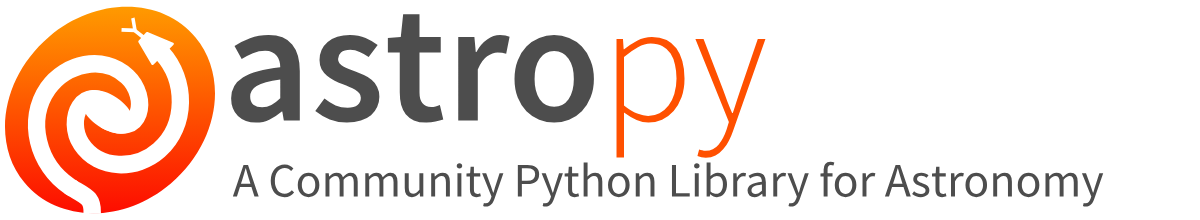 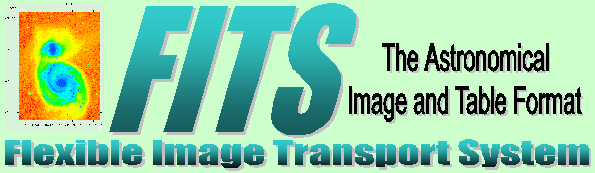!
 

#  <span style="color:green">Introduction To FITS File Handling</span>
A FITS file (Flexible Image Transport System) is a standard digital file format used in astronomy to store, transmit, and manipulate scientific data.

Key Features:
Developed by NASA  and widely adopted by the astronomical community.

Supports images(2D), spectra(1D), data cubes(3D, tables, and more.

Allows storage of metadata (header) alongside data in a structured, human-readable format.
Header conatins KEYWORLD, VALUE and COMMENT

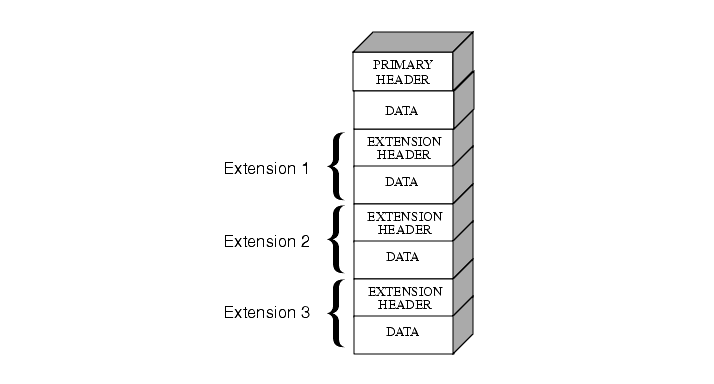

# Part-1: Visualising FITS IMAGE From SDSS Telescope Data
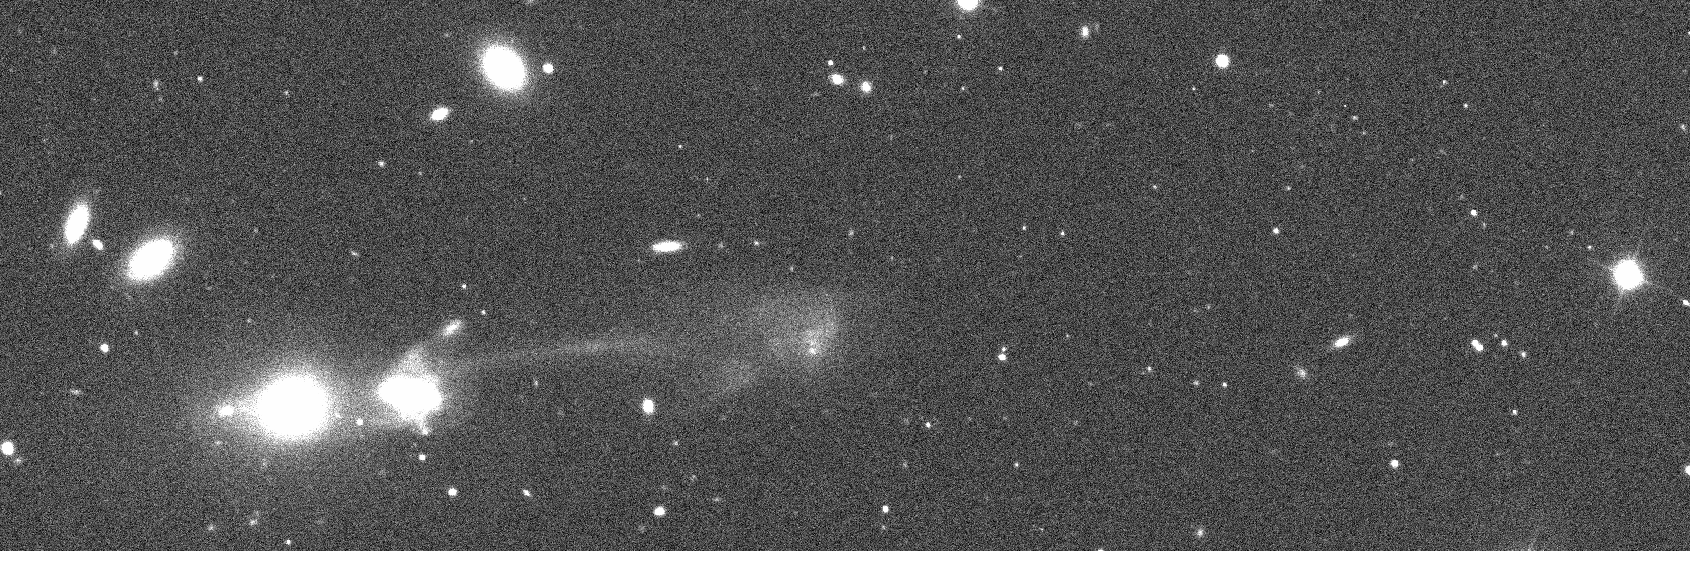


##### Step-0:  <span style="color:red">Python library installation: Numpy,matplotlib,Astropy</span>

In [1]:
pip install numpy matplotlib astropy ipympl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##### Step-1:  <span style="color:magenta">Download FITS Image/Spectra</span>
##### click here: click here: https://skyserver.sdss.org/dr16/en/tools/chart/navi.aspx 

##### Step-2:  <span style="color:blue">Import Required library</span>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits #handles fits data
from matplotlib.colors import LogNorm

##### Step-3: <span style="color:violet"> Read FITS IMAGE File</span>

In [5]:
file=fits.open('frame-r-005071-3-0347.fits')

##### Step-4:  <span style="color:indigo">Extract File information</span>

In [6]:
file.info()  #metadata

Filename: frame-r-005071-3-0347.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


##### Step-5: <span style="color:navyblue">Extract Header information</span>

In [7]:
file[0].header #file no1 header.all 96 cards displayed

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4609823091.17 / 1st row - Number of seconds since Nov 17 1858  
RA      =            167.20433 / 1st row - Right ascension of telescope boresigh
DEC     =            28.798722 / 1st row - Declination of telescope boresight (d
SPA     =              81.210  / 1st row - Camera col position angle wrt north (
IPA     =             154.95

##### Step-6:  <span style="color:darkred">Extract 2D Image Data</span>

In [13]:
image_data=file[0].data  #data in matrix form
image_data #y=20,x=20. if we give image_data[20,10] it gives intensity of that coordinate of the matrix

array([[-0.02612305, -0.00144768,  0.02322388, ..., -0.02090454,
         0.00368881, -0.00122833],
       [ 0.00348282,  0.03308105, -0.01623535, ..., -0.01599121,
        -0.07006836, -0.02087402],
       [ 0.00348663, -0.00144768, -0.01623535, ...,  0.00860596,
         0.06762695, -0.00122833],
       ...,
       [ 0.0144043 , -0.03985596,  0.04400635, ..., -0.0592041 ,
        -0.00018239,  0.03912354],
       [ 0.00947571,  0.0144043 , -0.00039244, ..., -0.04443359,
        -0.00509644, -0.02966309],
       [-0.00039148,  0.04400635,  0.02426147, ...,  0.02932739,
         0.00473785, -0.02474976]], dtype='>f4')

##### Step-6:  <span style="color:red">Visualize Distribution of Pixel Intensity Value </span>

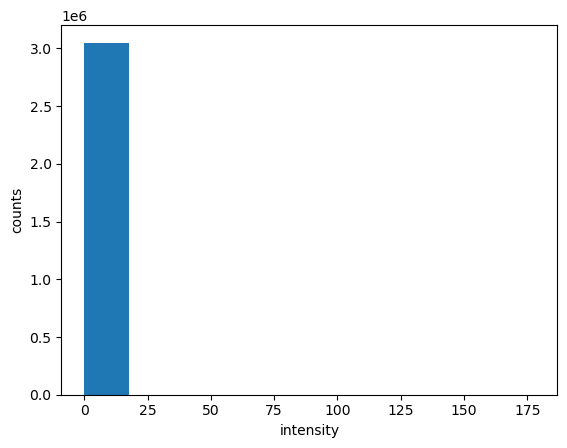

In [17]:
plt.figure()
plt.hist(np.ravel(image_data)) #converting 2d to 1d data. most recurring pixel intensity values represented. basically the galaxy part intensity is the most common intensity in that image. thats why the value is high
plt.ylabel('counts')
plt.xlabel('intensity')
plt.show()

##### Step-7: <span style="color:green">Visualize FITS Image in PIXEL Space </span>

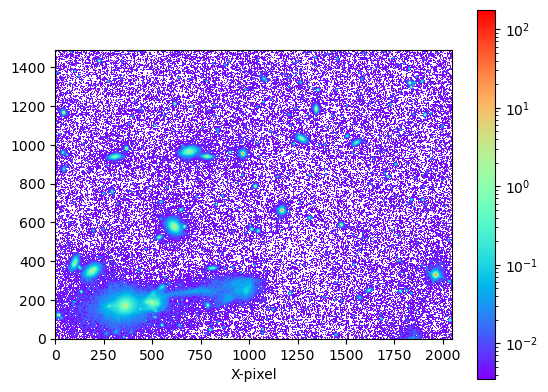

In [49]:
plt.figure()
plt.imshow(image_data,norm=LogNorm(),origin='lower',cmap='rainbow') #colorbar represents pixel intensity value. taking log value for better 2d representation
plt.xlabel('X-pixel')
plt.colorbar()
plt.savefig('my_image.jpg',dpi=300)
plt.show()

##### Step-8:<span style="color:black">Create 2d Image Cutout</span>

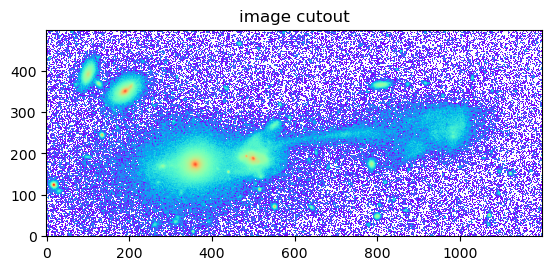

In [33]:
cut_2d=image_data[0:500,0:1200]
plt.figure()
plt.imshow(cut_2d,norm=LogNorm(),origin='lower',cmap='rainbow') #colorbar represents pixel intensity value
plt.title('image cutout')
plt.show()   #above image we are making bigger

##### Step-8:  <span style="color:blue">1D Intensity Profile: Vertical and Horizontal</span>

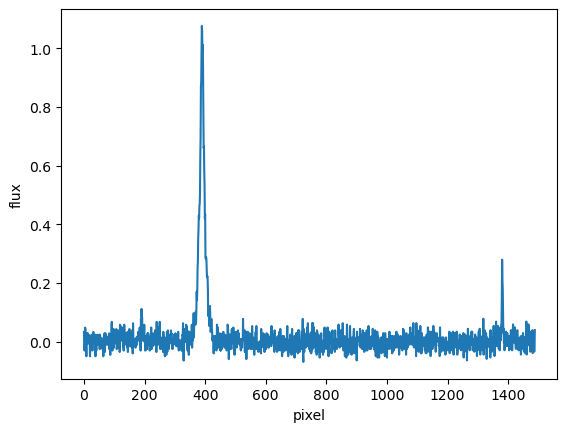

In [39]:
plt.figure()
plt.plot(image_data[:,100]) #along row/column. for row its [100:,]
plt.ylabel('flux') #flux is like intensity. across the pixels what is the intensity basically. these graphs are like 1d representations of 2d images
plt.xlabel('pixel')
plt.show()

##### Step-10:   <span style="color:green">Visualize FITS Image in WCS Space</span>

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


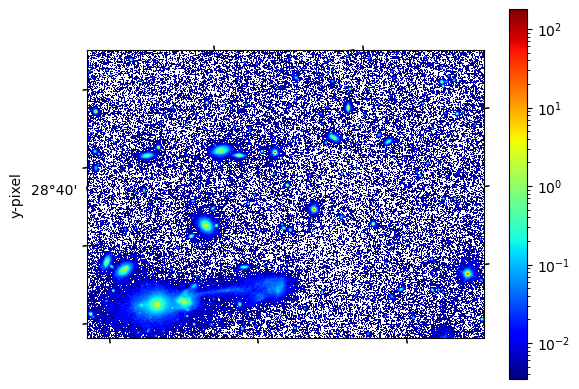

In [48]:
from astropy.wcs import WCS #world coordinate system. ra,dec coord system
wcs = WCS(file[0].header)
wcs

plt.figure()
plt.subplot(projection=wcs)
# plt.figure()
plt.imshow(image_data, norm=LogNorm(),origin='lower',cmap='jet')
plt.colorbar()
plt.xlabel("x-pixel")
plt.ylabel("y-pixel")
plt.show()